# Simple Linear

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset=pd.read_csv('market.csv',sep=';')

In [5]:
dataset.head()

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700


In [6]:
dataset=dataset.drop(columns=['Date'])

In [7]:
dataset.head()

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700


Text(0.5, 1.0, 'Stock Market')

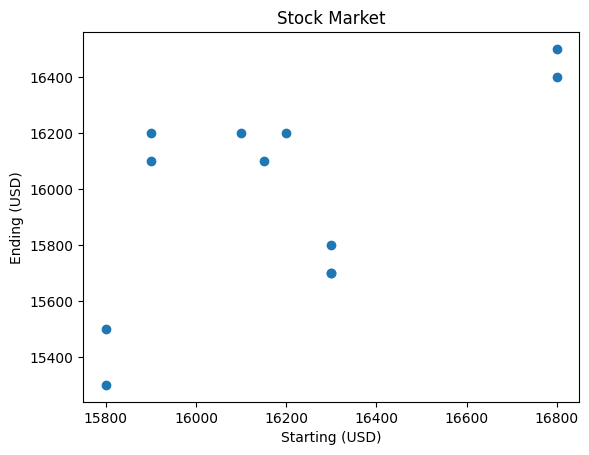

In [8]:
plt.scatter(dataset['Starting (USD)'],dataset['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Stock Market')

In [9]:
dataset.isnull().sum()

Starting (USD)    0
Ending (USD)      0
dtype: int64

In [10]:
x=dataset.drop('Ending (USD)',axis=1)
x.head()

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300


In [11]:
y=dataset[['Ending (USD)']]
y.head()

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700


In [12]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [13]:
x.mean()

Starting (USD)    16195.833333
dtype: float64

In [14]:
y.mean()

Ending (USD)    15975.0
dtype: float64

Text(0.5, 1.0, 'Stock Market')

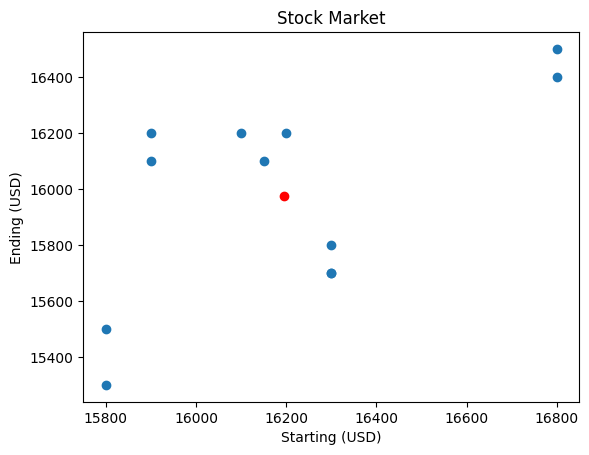

In [15]:
plt.scatter(x.mean(),y.mean(),color='red')
plt.scatter(dataset['Starting (USD)'],dataset['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Stock Market')

In [16]:
reg.fit(x,y) # fit means training the model

LinearRegression()

In [17]:
m=reg.coef_

In [18]:
c=reg.intercept_
c

array([5405.87555702])

In [19]:
m*1700+c

array([[6515.26654563]])

In [20]:
dataset['Predict_Y']=reg.predict(x)
dataset.head()

,Starting (USD),Ending (USD),Predict_Y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


In [21]:
reg.predict([[1700]])

f:\git\Mechine_learning\env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[6515.26654563]])

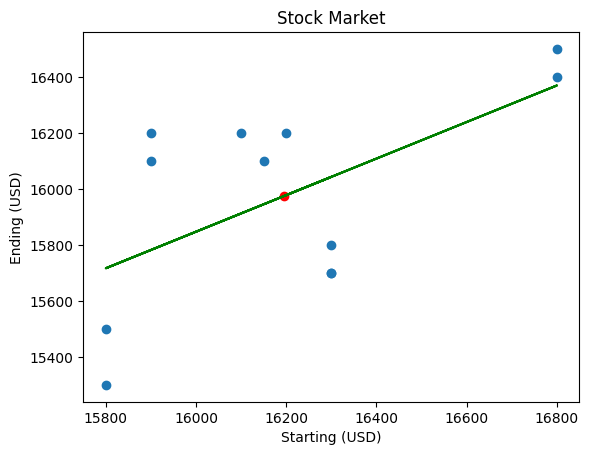

In [22]:
plt.scatter(x.mean(),y.mean(),color='red')
plt.scatter(dataset['Starting (USD)'],dataset['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Stock Market')
plt.plot(x,reg.predict(x),color='green')

## loss and Cost

In [23]:
dataset['Loss']=dataset['Ending (USD)'] -dataset['Predict_Y'] 
dataset.head()

,Starting (USD),Ending (USD),Predict_Y,Loss
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389


In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [25]:
mae=mean_absolute_error(dataset['Ending (USD)'],dataset['Predict_Y'])
mae

260.3840017604666

In [26]:
mse=mean_squared_error(dataset['Ending (USD)'],dataset['Predict_Y'])
mse

80411.23397700385

## score meas (performance)..here performance .35%

## score() --> performance

In [27]:
reg.score(x,y)

0.3577804940272571

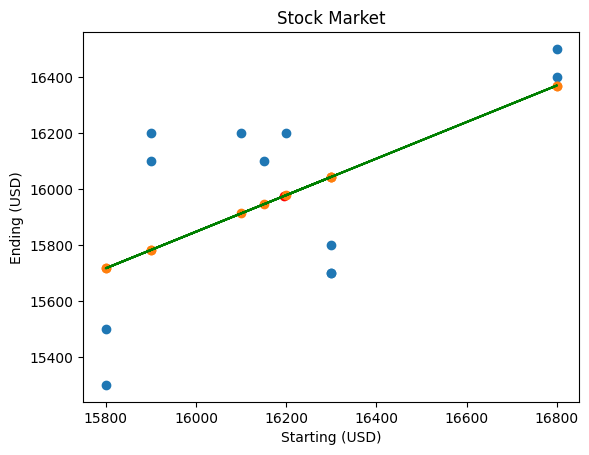

In [30]:
plt.scatter(x.mean(),y.mean(),color='red')
plt.scatter(dataset['Starting (USD)'],dataset['Ending (USD)'])
plt.scatter(dataset['Starting (USD)'],reg.predict(x))
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Stock Market')
plt.plot(x,reg.predict(x),color='green')